In [2]:
import duckdb as ddb

c = ddb.connect("nyc-taxi.duckdb")
c

In [3]:
yellow_parquets = "data/yellow/data.parquet/*/*.parquet"

In [4]:
import numpy as np
import pandas as pd
import dask.dataframe as dd

from distributed import Client

In [7]:
#dc = Client()
#dc

In [8]:
%%time

query = """
select
    *
from yellow
where tip_amount < 0
""".lstrip()

df = c.execute(query).df()
df.head()

CPU times: user 8.6 s, sys: 2.3 s, total: 10.9 s
Wall time: 20.6 s


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2022-01-01 12:05:06,2022-01-01 12:05:16,1.0,0.0,1.0,N,193,193,3,-2.5,0.0,-0.5,-0.13,0.0,-0.3,-3.43,0.0,0.0
1,2,2022-01-01 13:53:00,2022-01-01 13:53:59,1.0,0.0,1.0,N,193,193,3,-2.5,0.0,-0.5,-0.01,0.0,-0.3,-3.31,0.0,0.0
2,2,2019-02-01 01:38:58,2019-02-01 01:39:05,5.0,0.0,1.0,N,264,193,3,-2.5,-0.5,-0.5,-0.76,0.0,-0.3,-4.56,0.0,NaN
3,2,2022-03-01 07:06:37,2022-03-01 07:06:43,1.0,0.0,1.0,N,193,193,3,-2.5,0.0,-0.5,-0.82,0.0,-0.3,-4.12,0.0,0.0
4,2,2022-02-01 09:17:44,2022-02-01 09:18:35,1.0,0.0,1.0,N,264,264,3,-2.5,0.0,-0.5,-0.66,0.0,-0.3,-3.96,0.0,0.0


In [9]:
len(df)

7299

In [10]:
df.tail()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
7294,2,2018-06-30 15:55:54,2018-06-30 15:56:53,2.0,0.00,1.0,N,193,193,3,-2.5,0.0,-0.5,-0.66,0.0,-0.3,-3.96,NaN,NaN
7295,2,2018-04-29 08:07:57,2018-04-29 08:12:04,2.0,0.71,1.0,N,239,142,4,-5.0,0.0,-0.5,-81.00,0.0,-0.3,-86.80,NaN,NaN
7296,2,2018-06-30 22:34:54,2018-06-30 22:36:17,3.0,0.00,1.0,N,193,193,3,-3.0,-0.5,-0.5,-0.86,0.0,-0.3,-5.16,NaN,NaN
7297,2,2018-04-30 18:20:20,2018-04-30 18:26:56,1.0,0.87,1.0,N,90,186,3,-6.0,-1.0,-0.5,-1.56,0.0,-0.3,-9.36,NaN,NaN
7298,2,2018-04-30 19:49:15,2018-04-30 19:49:17,1.0,0.00,1.0,N,4,4,4,-2.5,-1.0,-0.5,-0.86,0.0,-0.3,-5.16,NaN,NaN


In [11]:
xmin = min(df["tip_amount"])
xmin

-493.22

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="darkgrid")
sns.set(rc={"figure.figsize": (16, 18)})
plt.style.use("dark_background")

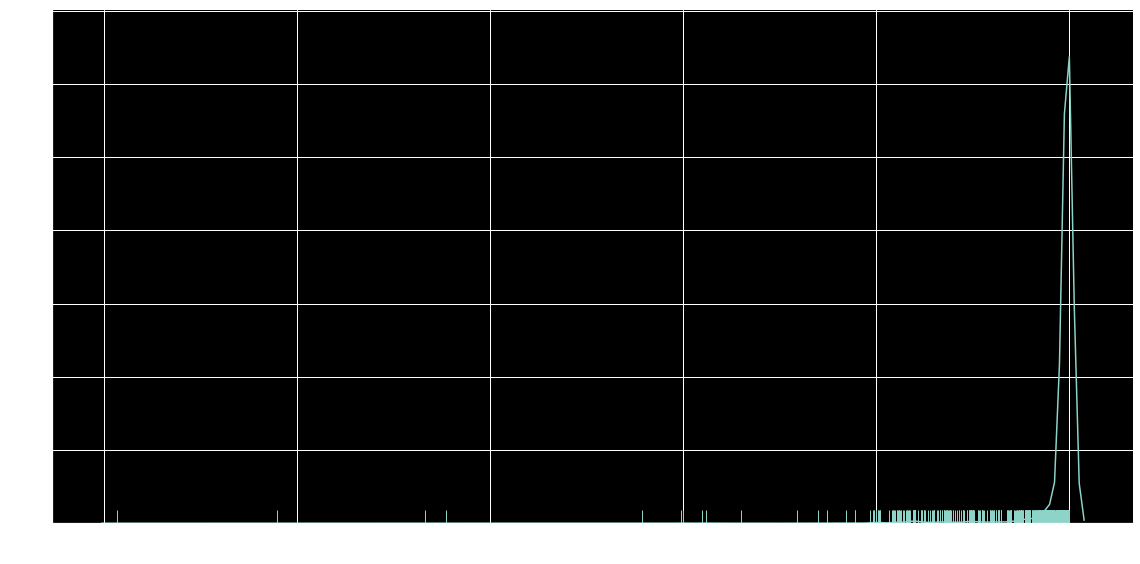

In [13]:
sns.displot(data=df, x="tip_amount", rug=True, height=8, aspect=2.0, kind="kde")

/Users/cody/venvs/ddb/lib/python3.9/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/Users/cody/venvs/ddb/lib/python3.9/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/Users/cody/venvs/ddb/lib/python3.9/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/Users/cody/venvs/ddb/lib/python3.9/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


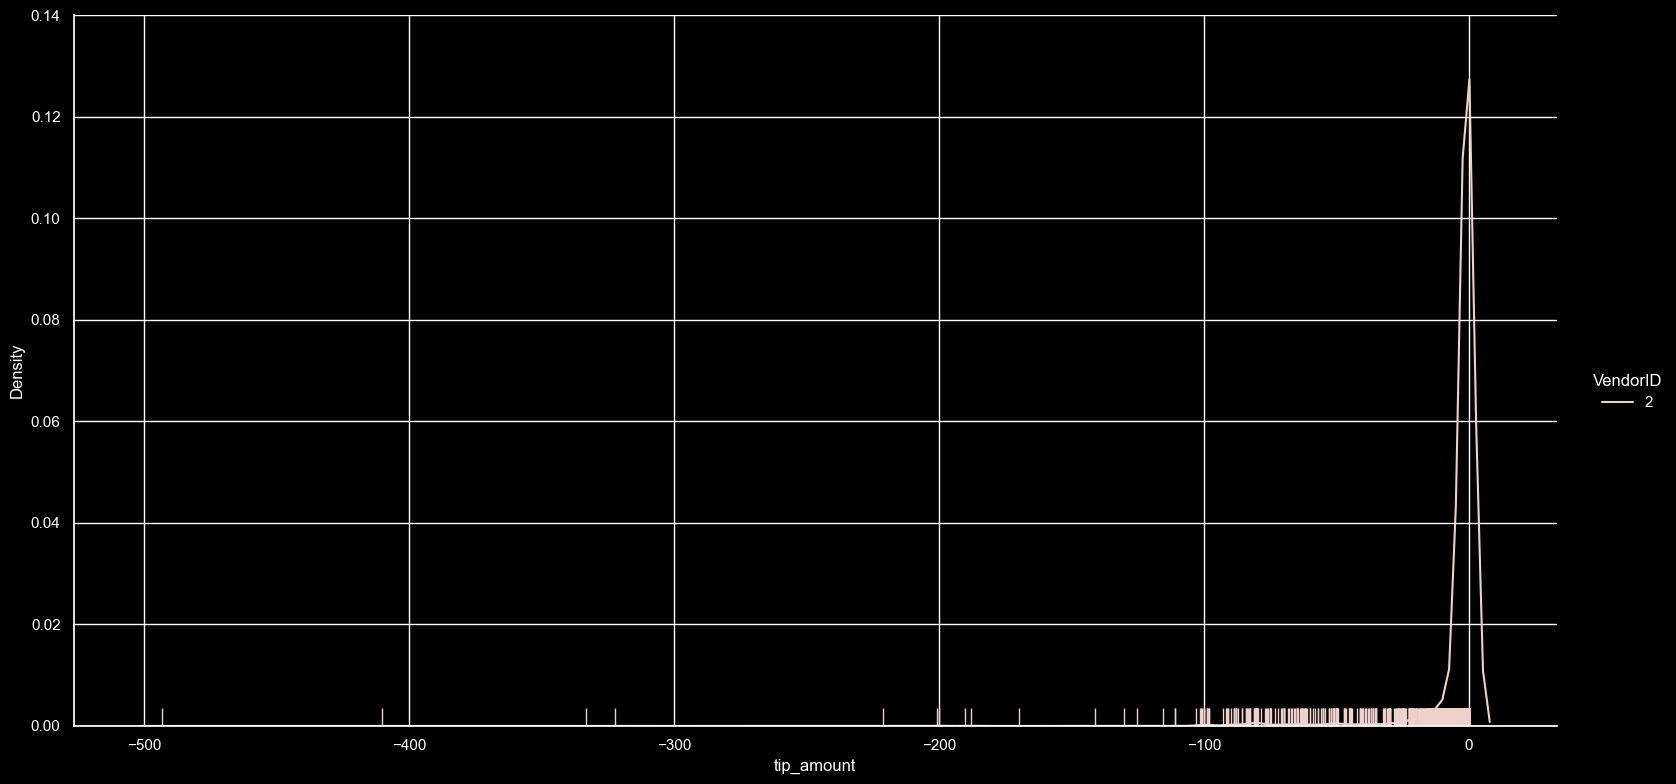

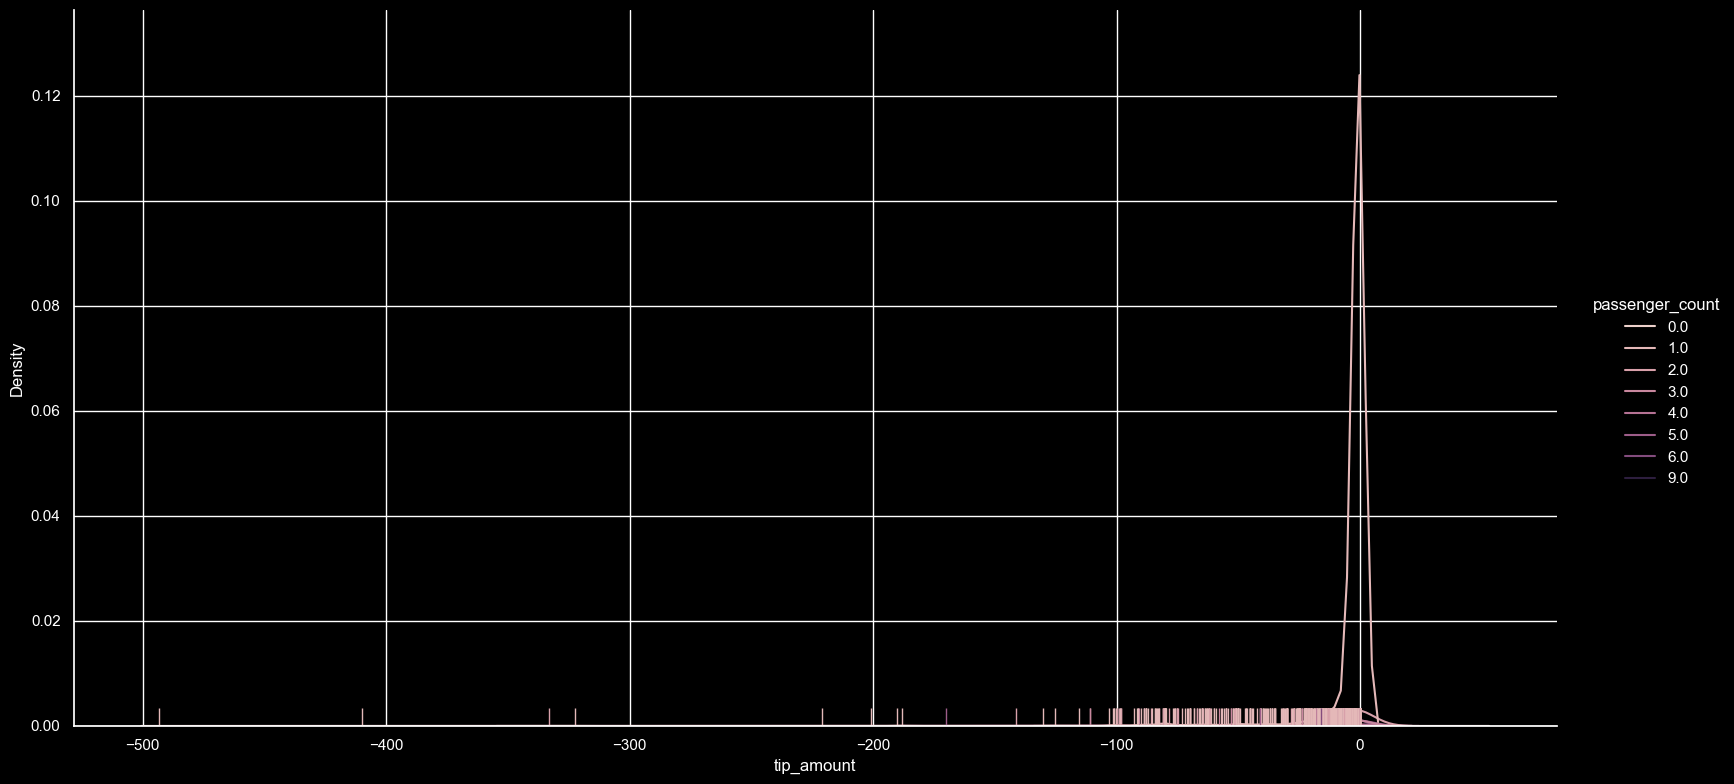

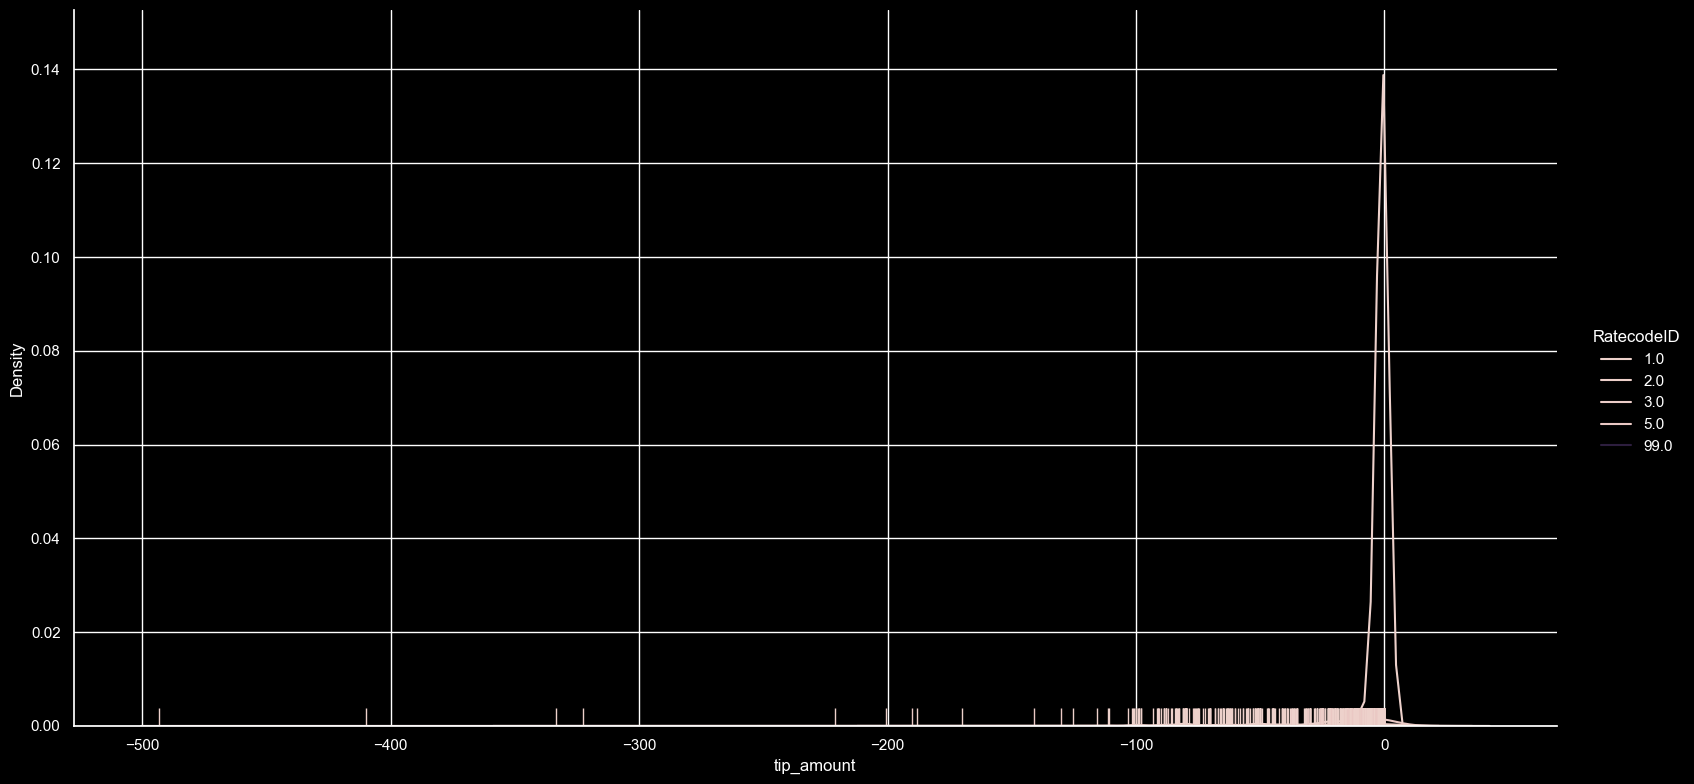

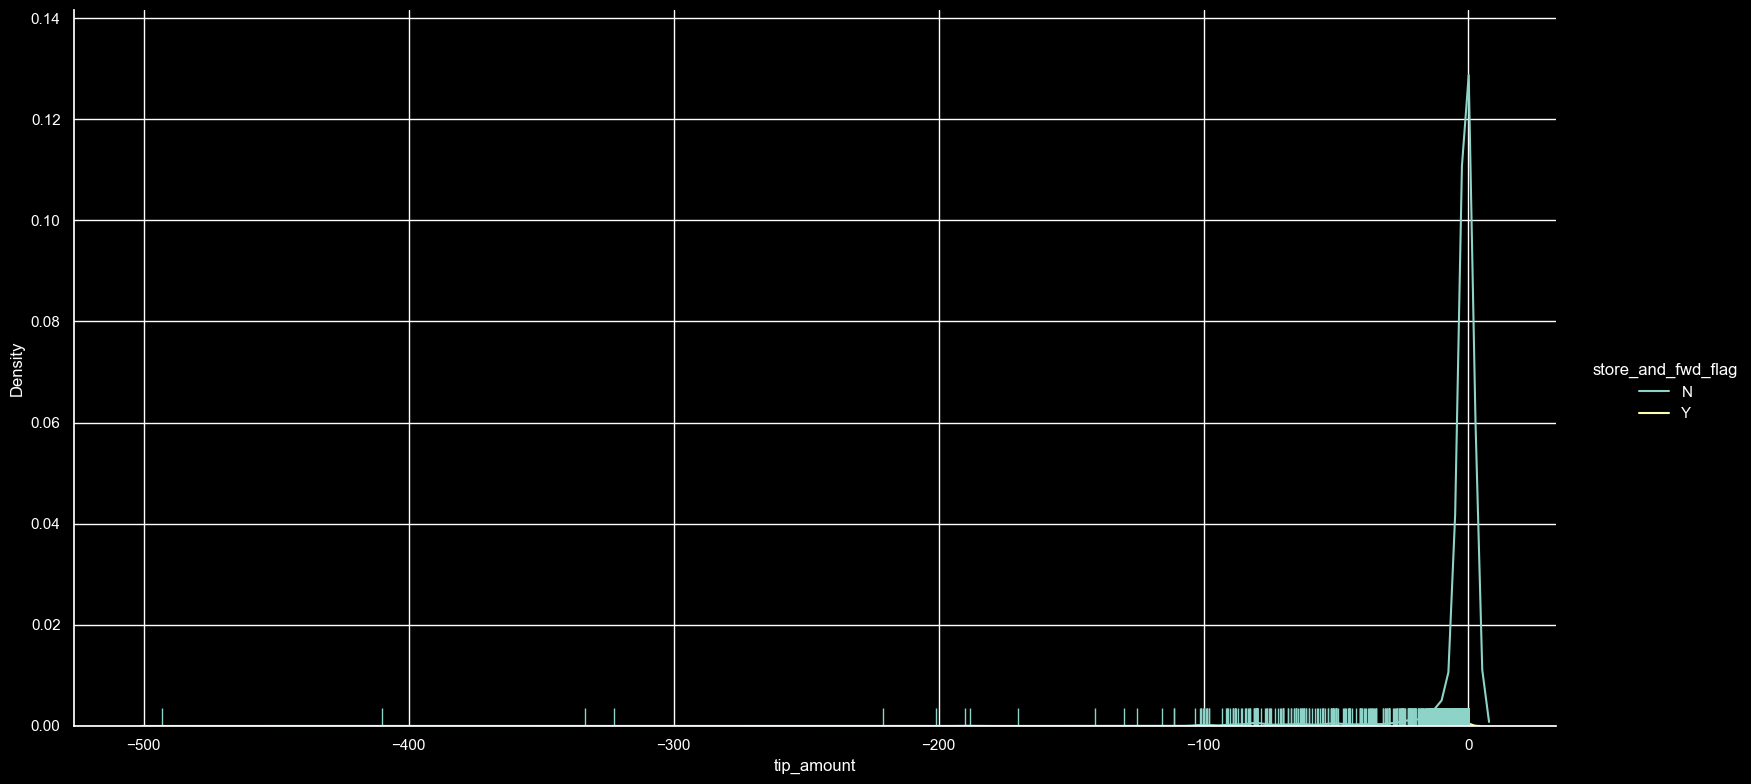

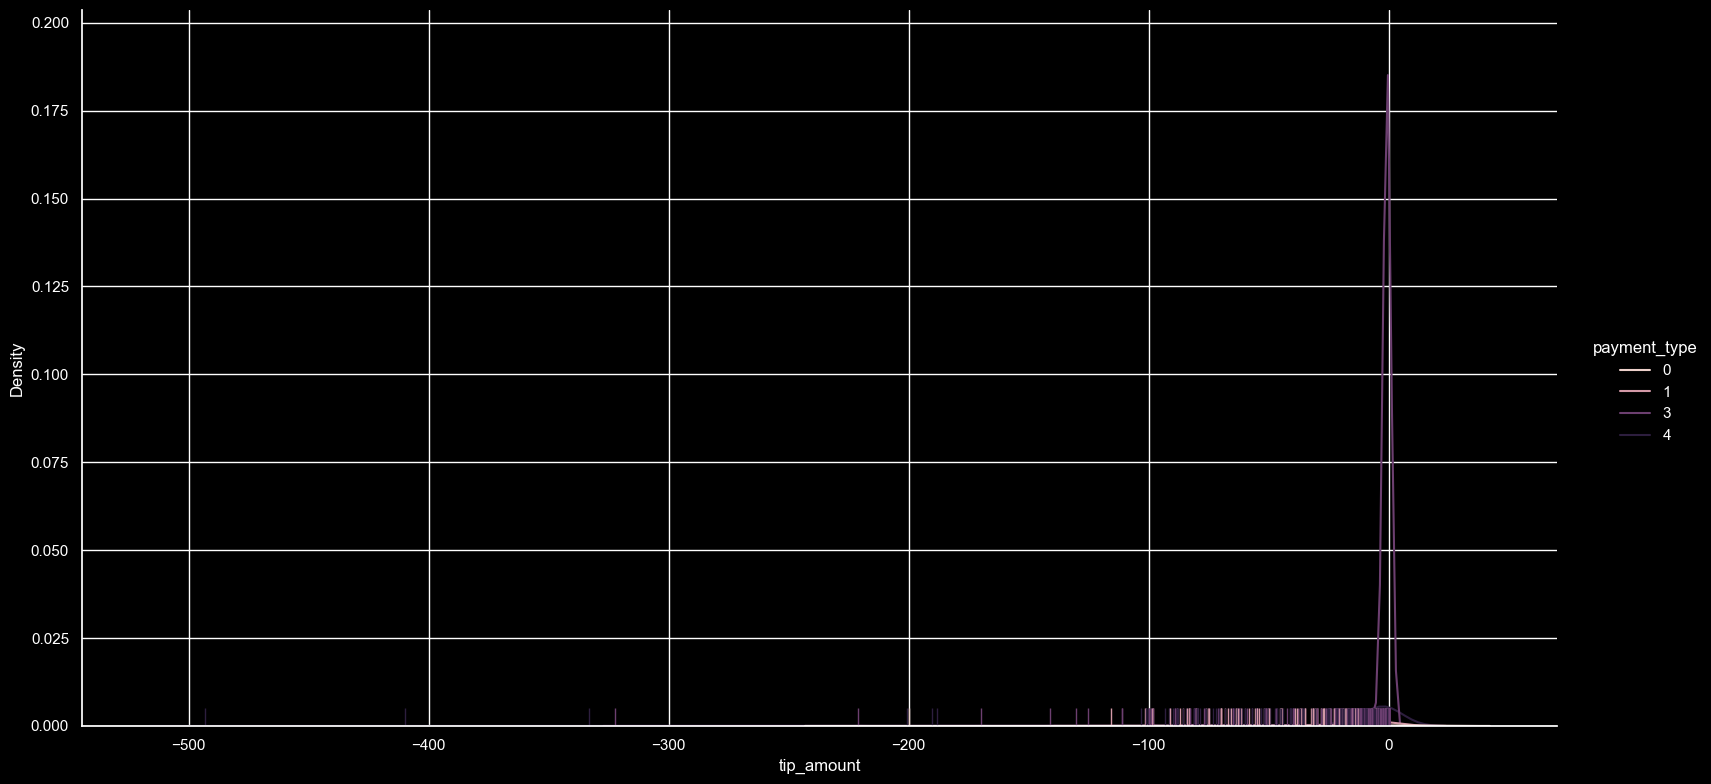

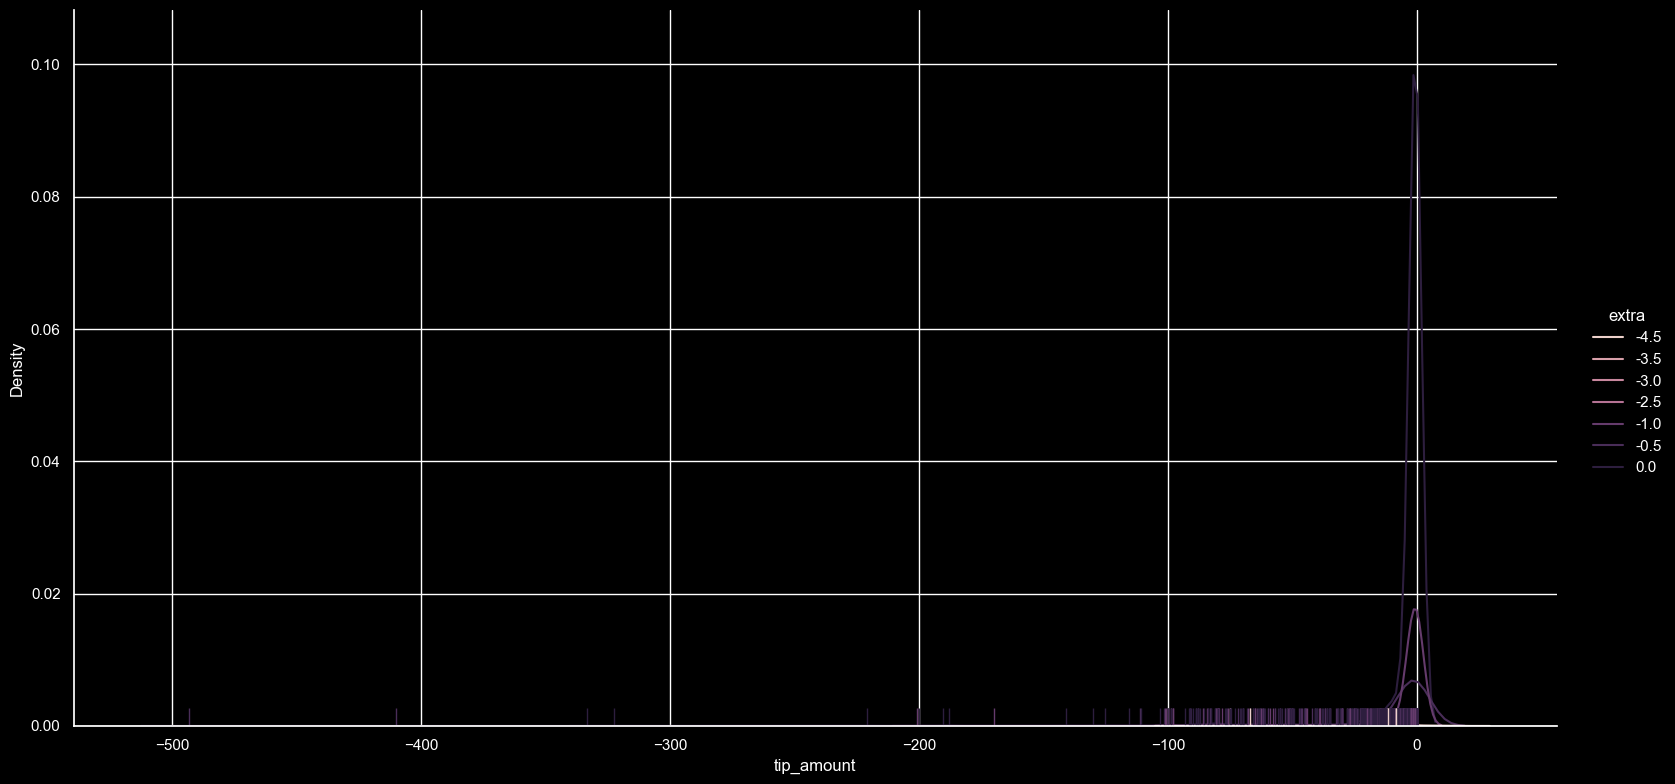

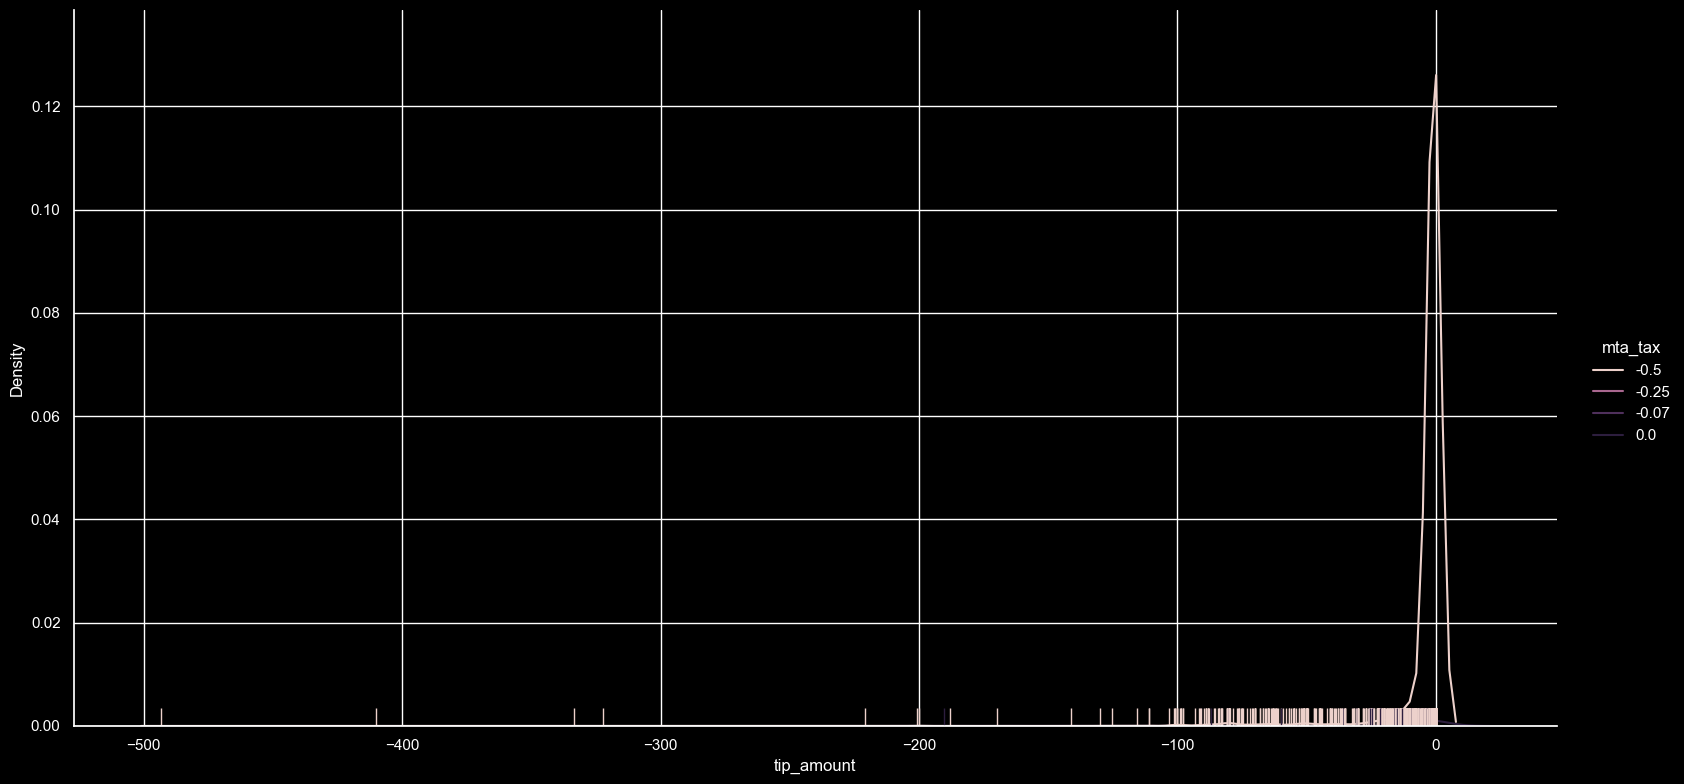

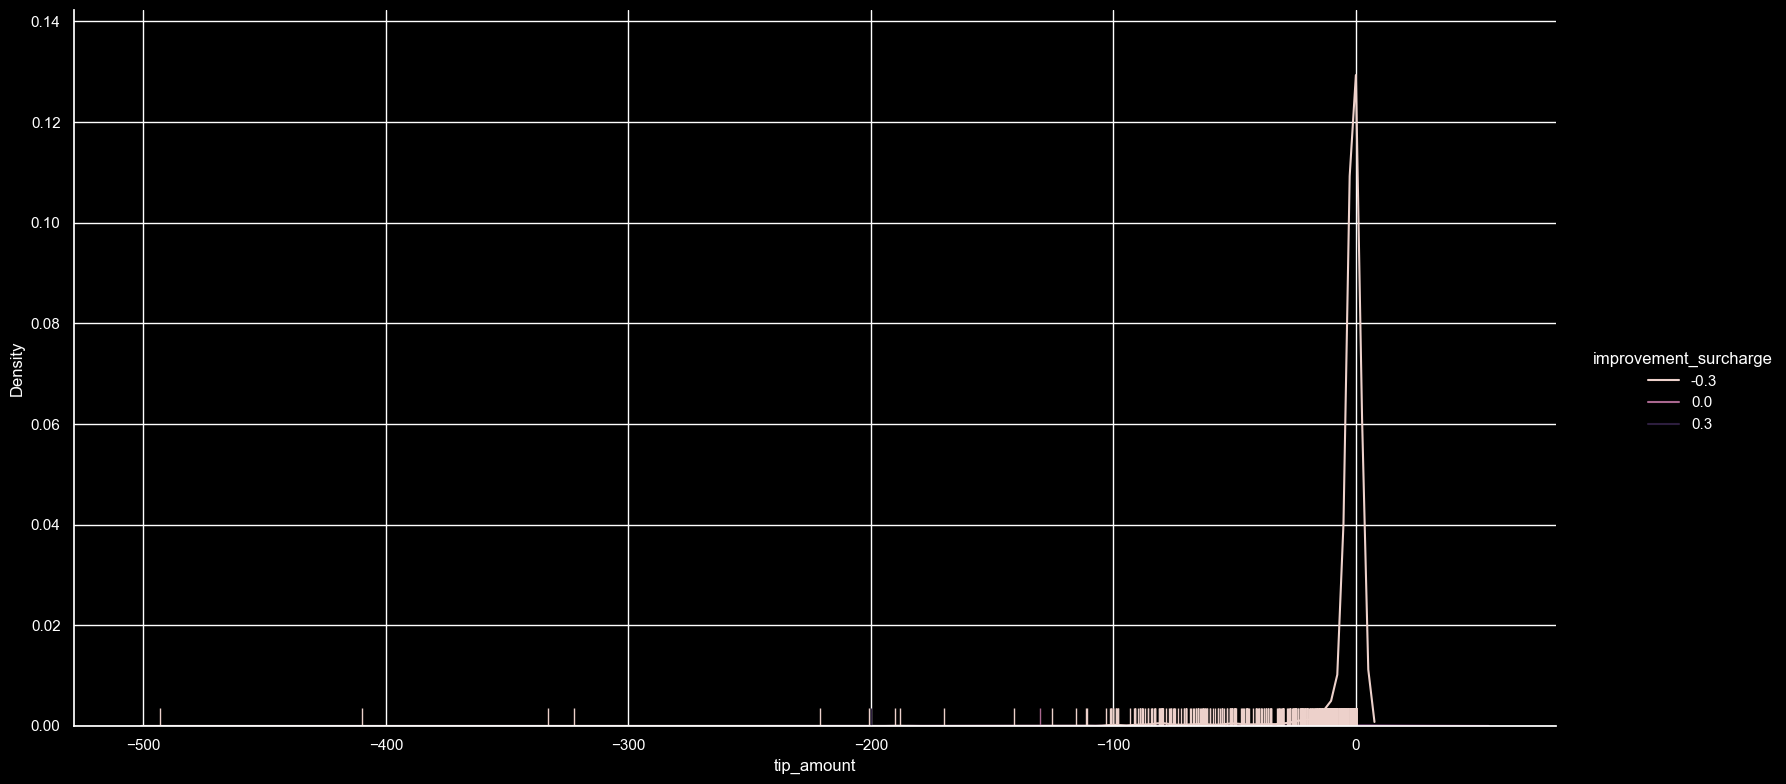

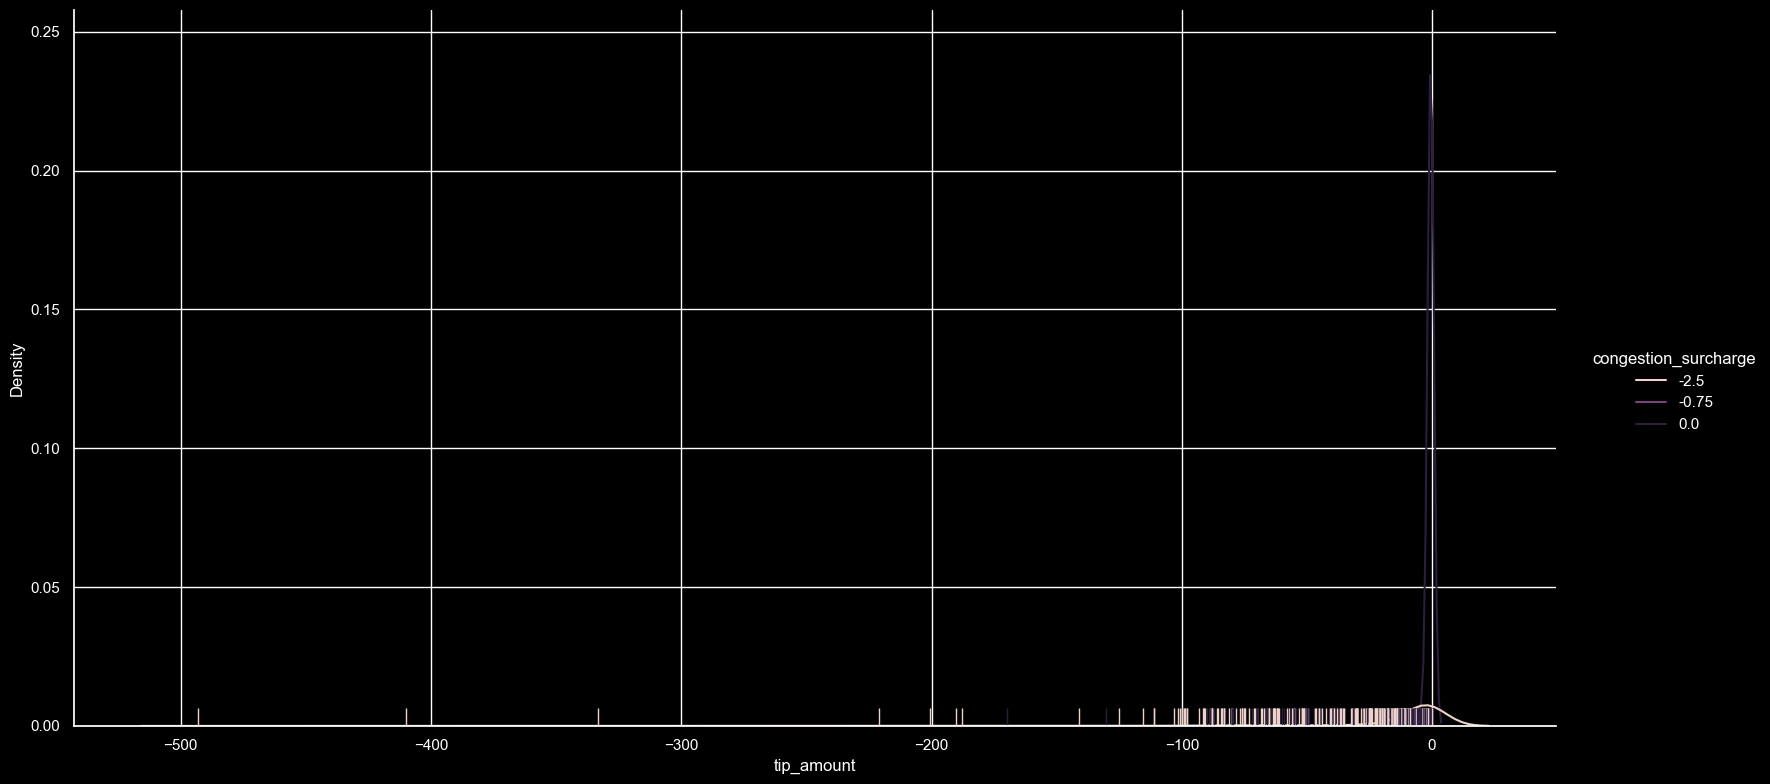

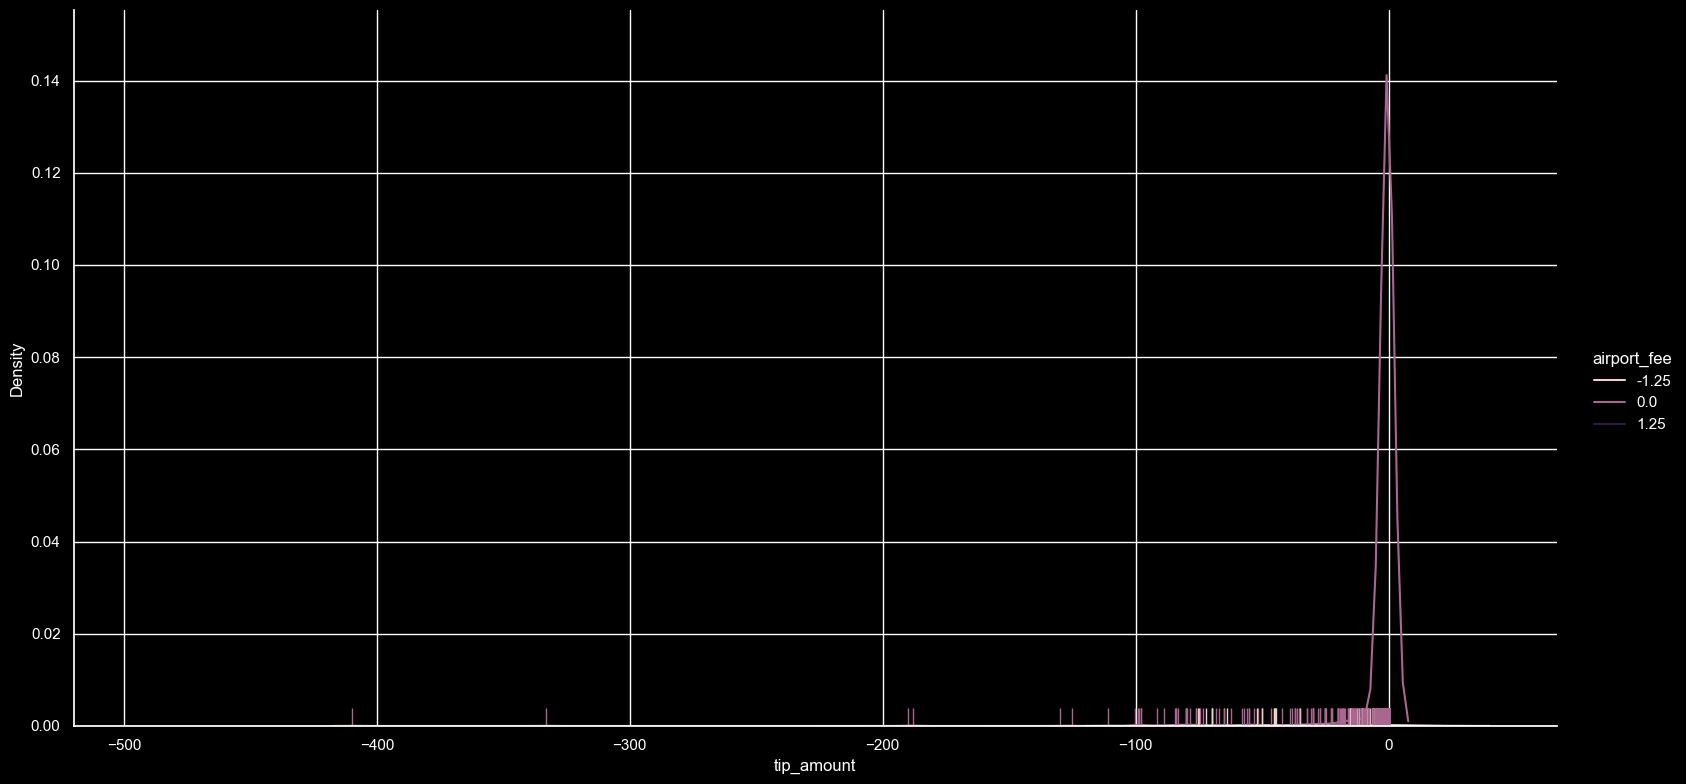

In [14]:
#sns.displot(df, x="tip_amount", binwidth=1)
for column in df.columns:
    if len(pd.unique(df[column])) < 10:
        sns.displot(data=df, x="tip_amount", rug=True, height=8, aspect=2.0, kind="kde", hue=column)

In [15]:
%%time

query = """
select
    *
from green
where total_amount < 0
""".lstrip()

df = c.execute(query).df()
df.head()

CPU times: user 761 ms, sys: 261 ms, total: 1.02 s
Wall time: 2.13 s


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2022-02-01 12:02:04,2022-02-01 12:07:43,N,1.0,43,75,1.0,0.34,-5.0,0.0,-0.5,0.0,0.0,NaN,-0.3,-5.8,3.0,1.0,0.0
1,2,2022-01-01 01:14:26,2022-01-01 01:19:18,N,1.0,42,166,1.0,0.72,-5.5,-0.5,-0.5,0.0,0.0,NaN,-0.3,-6.8,3.0,1.0,0.0
2,2,2022-01-01 02:50:04,2022-01-01 03:24:24,N,1.0,61,61,1.0,0.95,-5.0,-0.5,-0.5,0.0,0.0,NaN,-0.3,-6.3,4.0,1.0,0.0
3,2,2022-01-01 02:33:14,2022-01-01 02:36:35,N,1.0,116,116,1.0,0.57,-4.5,-0.5,-0.5,0.0,0.0,NaN,-0.3,-5.8,3.0,1.0,0.0
4,2,2022-01-01 11:11:28,2022-01-01 11:11:58,N,1.0,89,89,1.0,0.14,-2.5,0.0,-0.5,0.0,0.0,NaN,-0.3,-3.3,4.0,1.0,0.0


In [16]:
df.tail()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
50262,2,2018-06-30 23:55:10,2018-06-30 23:55:23,N,2.0,41,41,5.0,0.04,-52.0,0.0,-0.5,0.0,0.0,NaN,-0.3,-52.8,3.0,1.0,NaN
50263,2,2018-06-30 23:07:43,2018-06-30 23:11:17,N,1.0,146,193,1.0,0.68,-4.5,-0.5,-0.5,0.0,0.0,NaN,-0.3,-5.8,3.0,1.0,NaN
50264,2,2018-06-30 23:34:18,2018-06-30 23:37:41,N,1.0,145,145,1.0,0.60,-4.5,-0.5,-0.5,0.0,0.0,NaN,-0.3,-5.8,3.0,1.0,NaN
50265,2,2018-06-30 23:10:18,2018-06-30 23:15:56,N,1.0,74,74,1.0,0.90,-6.0,-0.5,-0.5,0.0,0.0,NaN,-0.3,-7.3,3.0,1.0,NaN
50266,2,2018-06-30 23:48:27,2018-06-30 23:54:29,N,1.0,188,188,1.0,0.14,-5.5,-0.5,-0.5,0.0,0.0,NaN,-0.3,-6.8,3.0,1.0,NaN


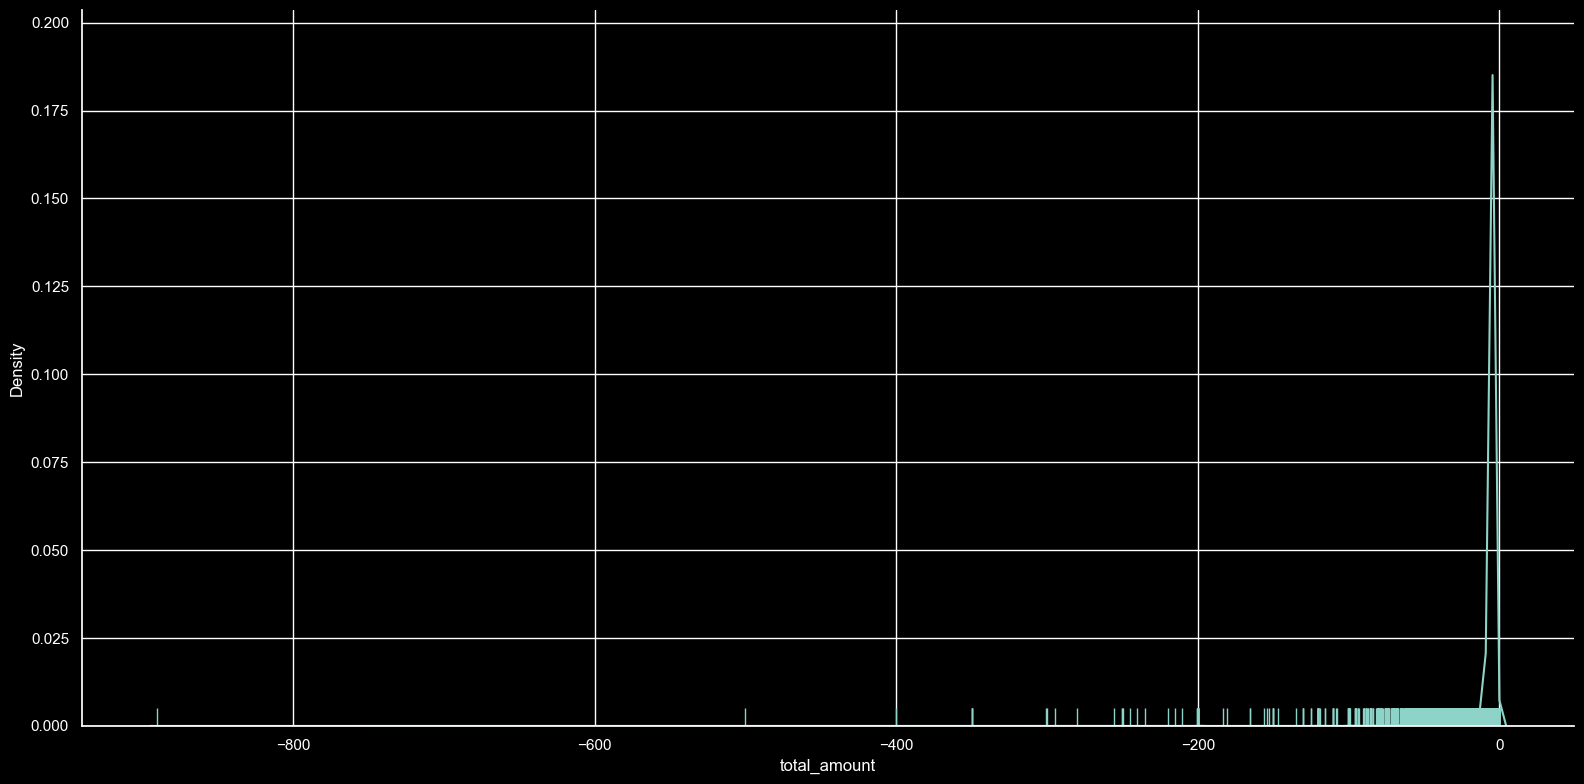

In [17]:
sns.displot(data=df, x="total_amount", rug=True, height=8, aspect=2.0, kind="kde")

/Users/cody/venvs/ddb/lib/python3.9/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/Users/cody/venvs/ddb/lib/python3.9/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


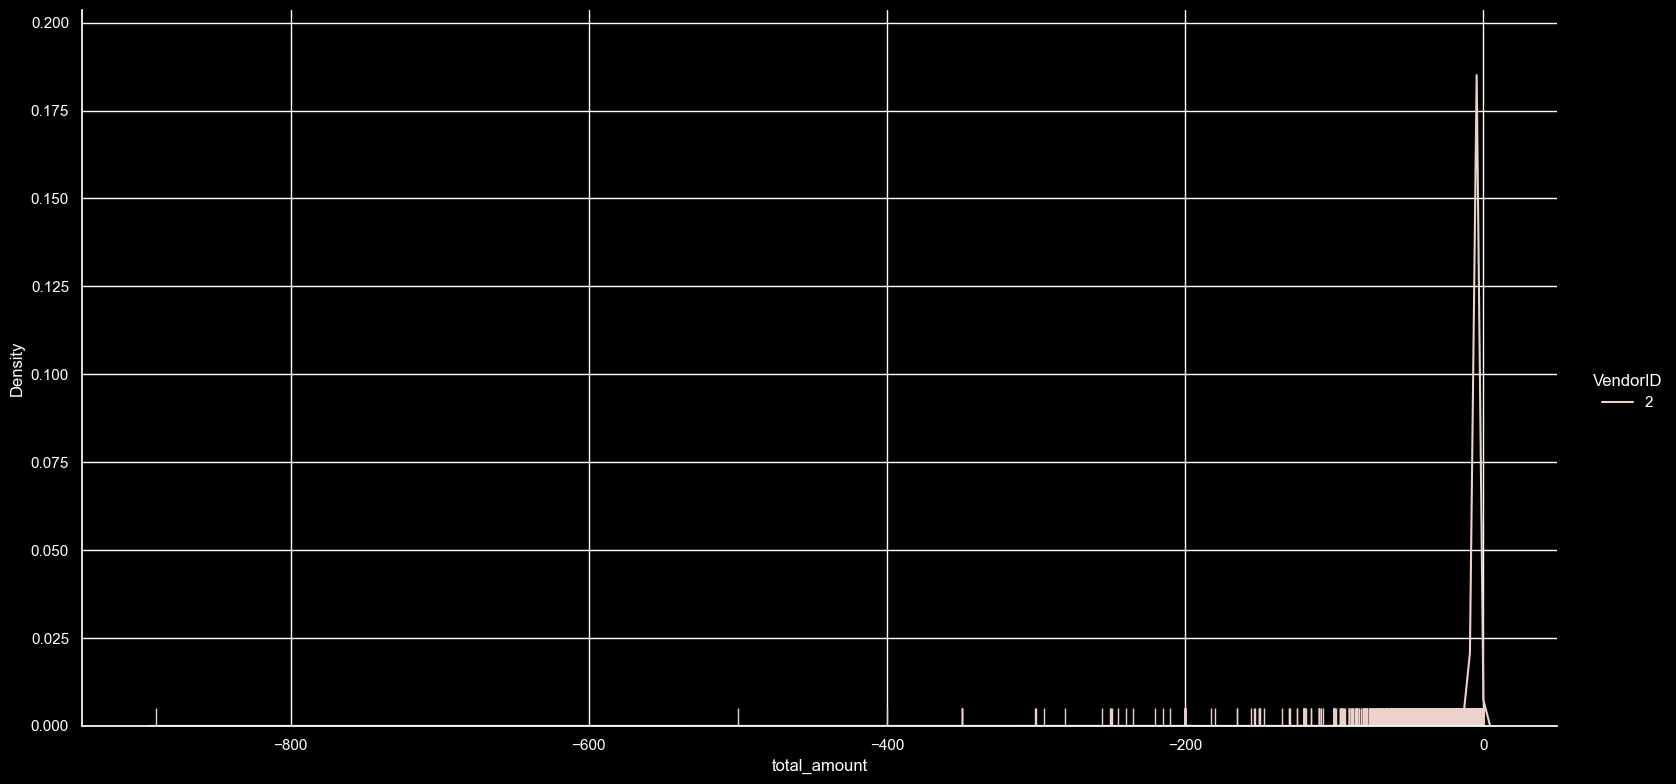

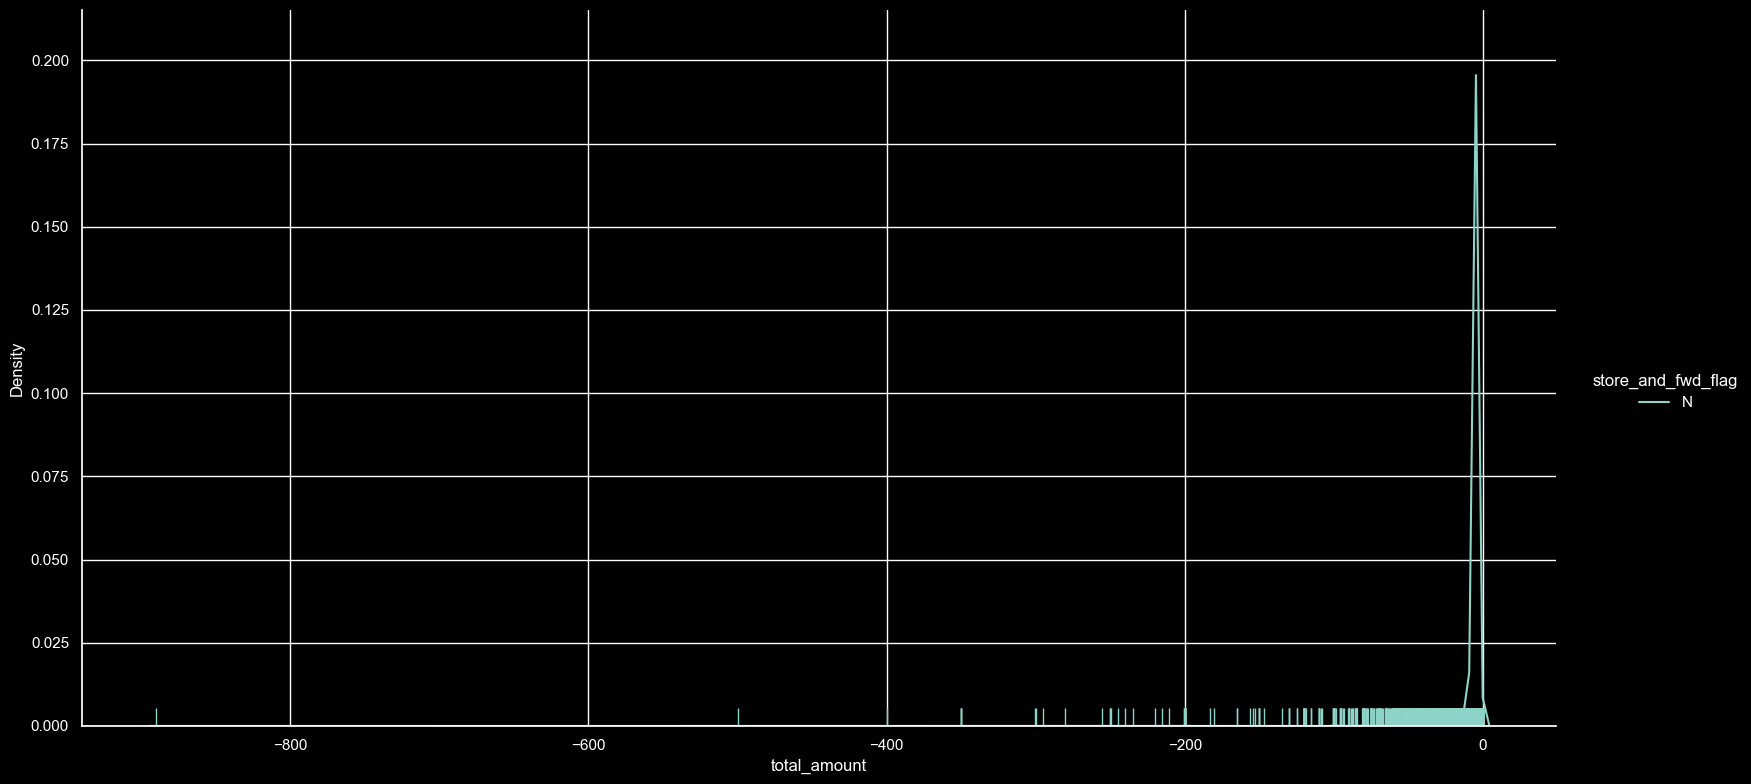

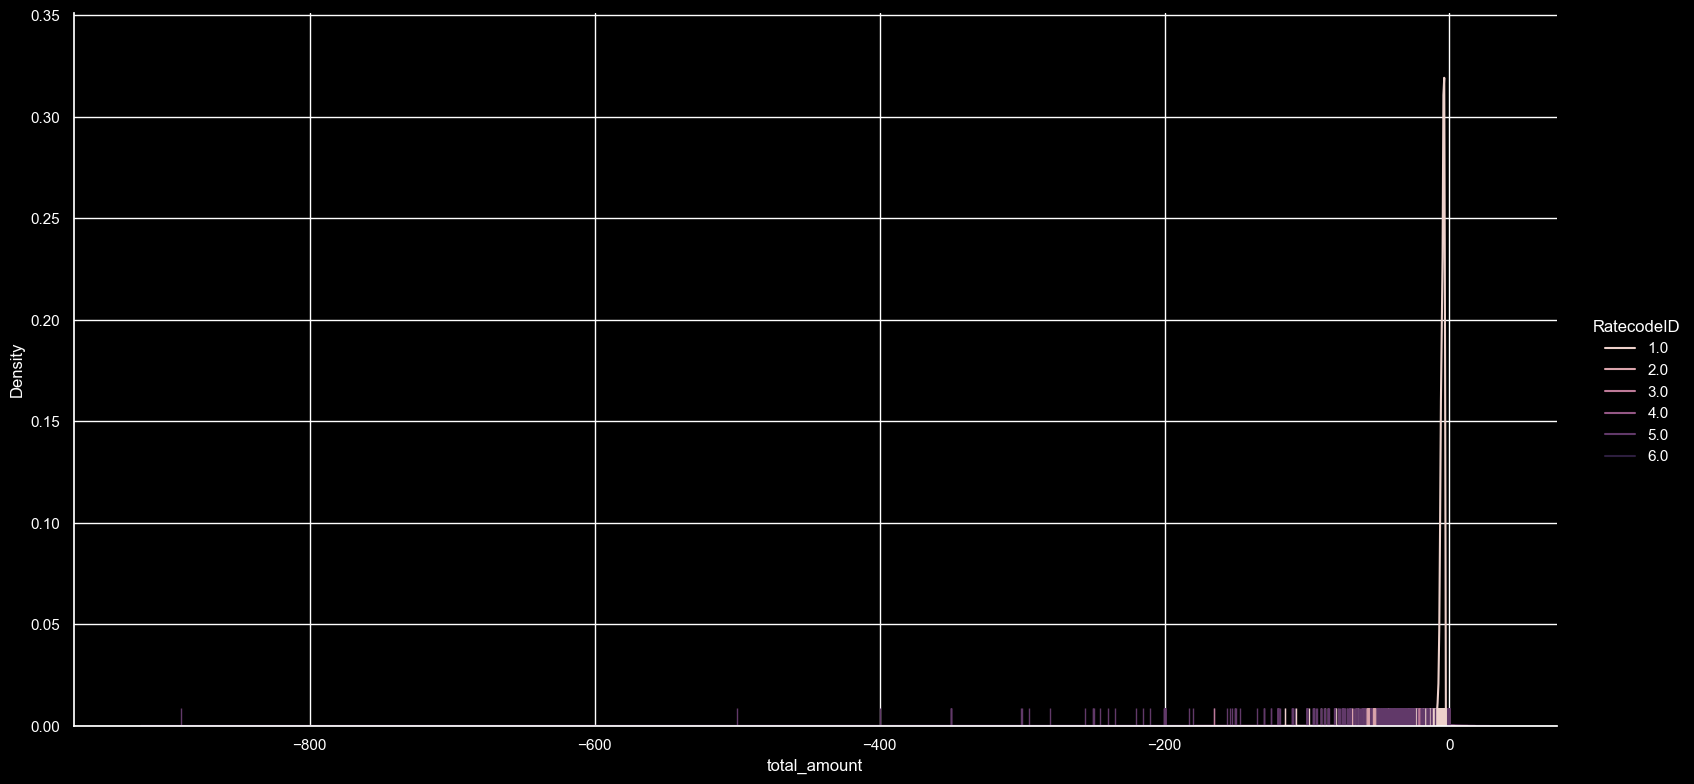

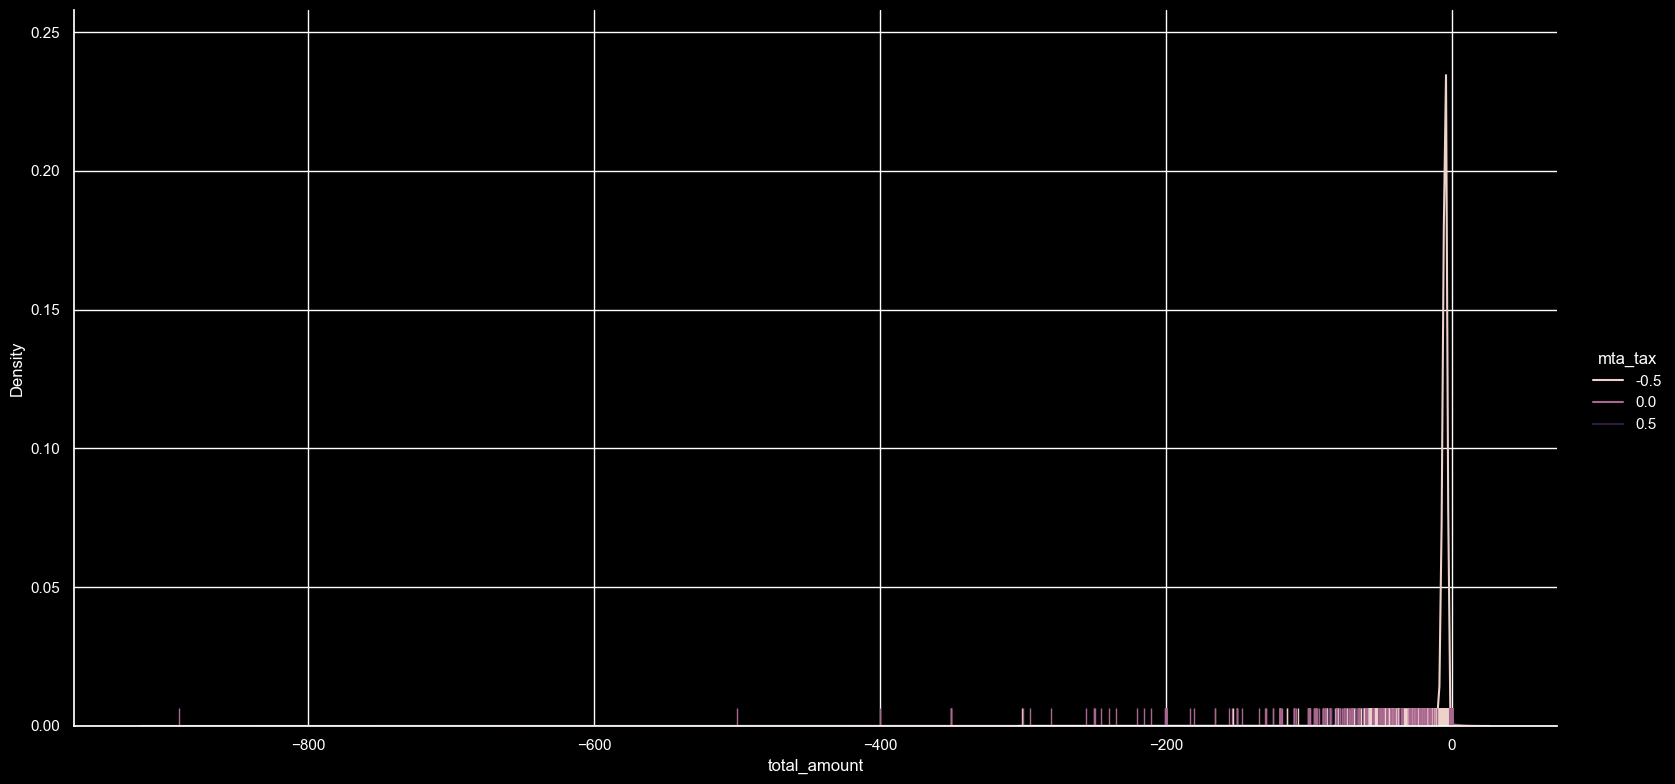

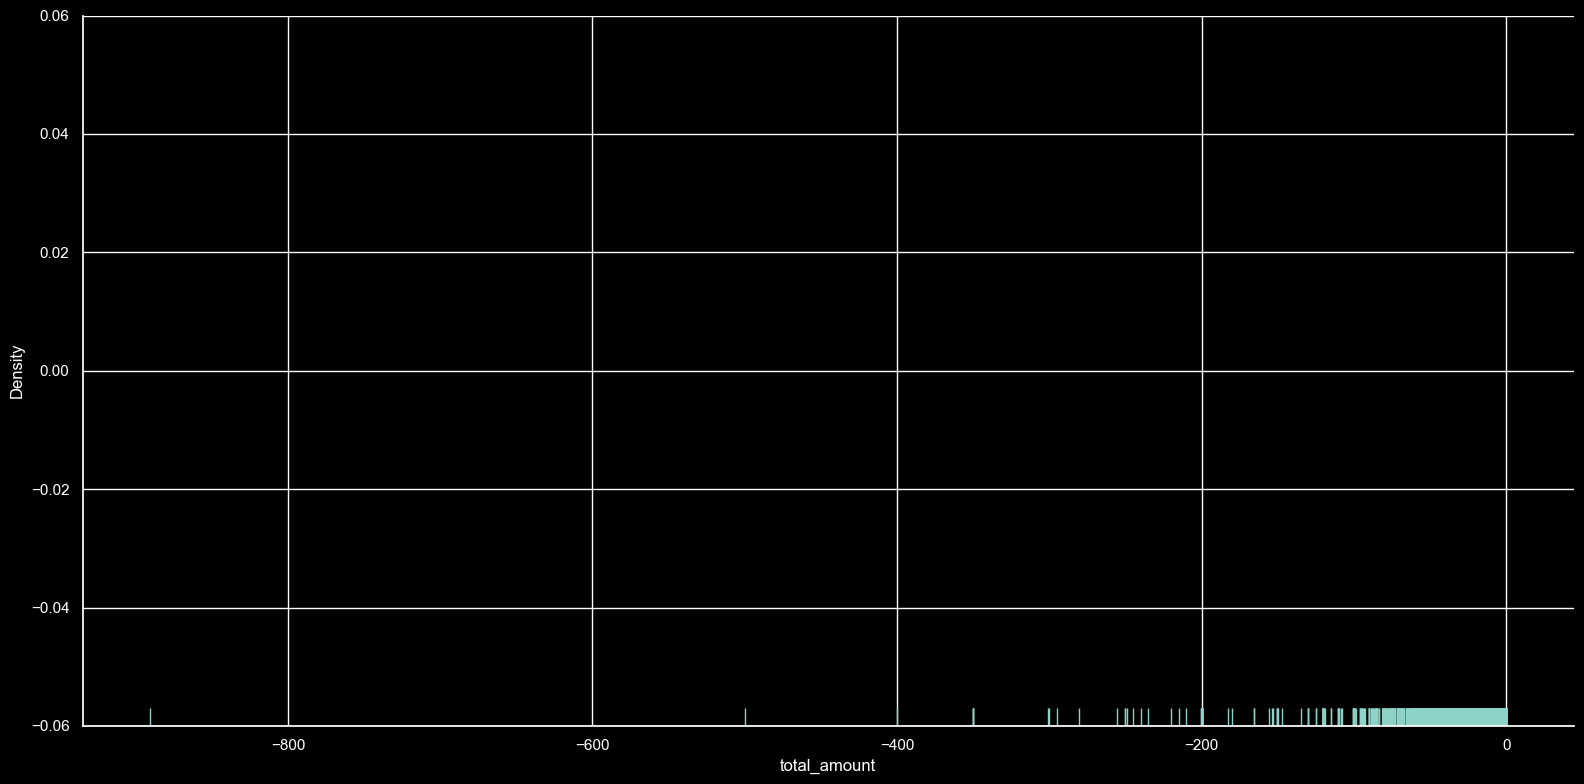

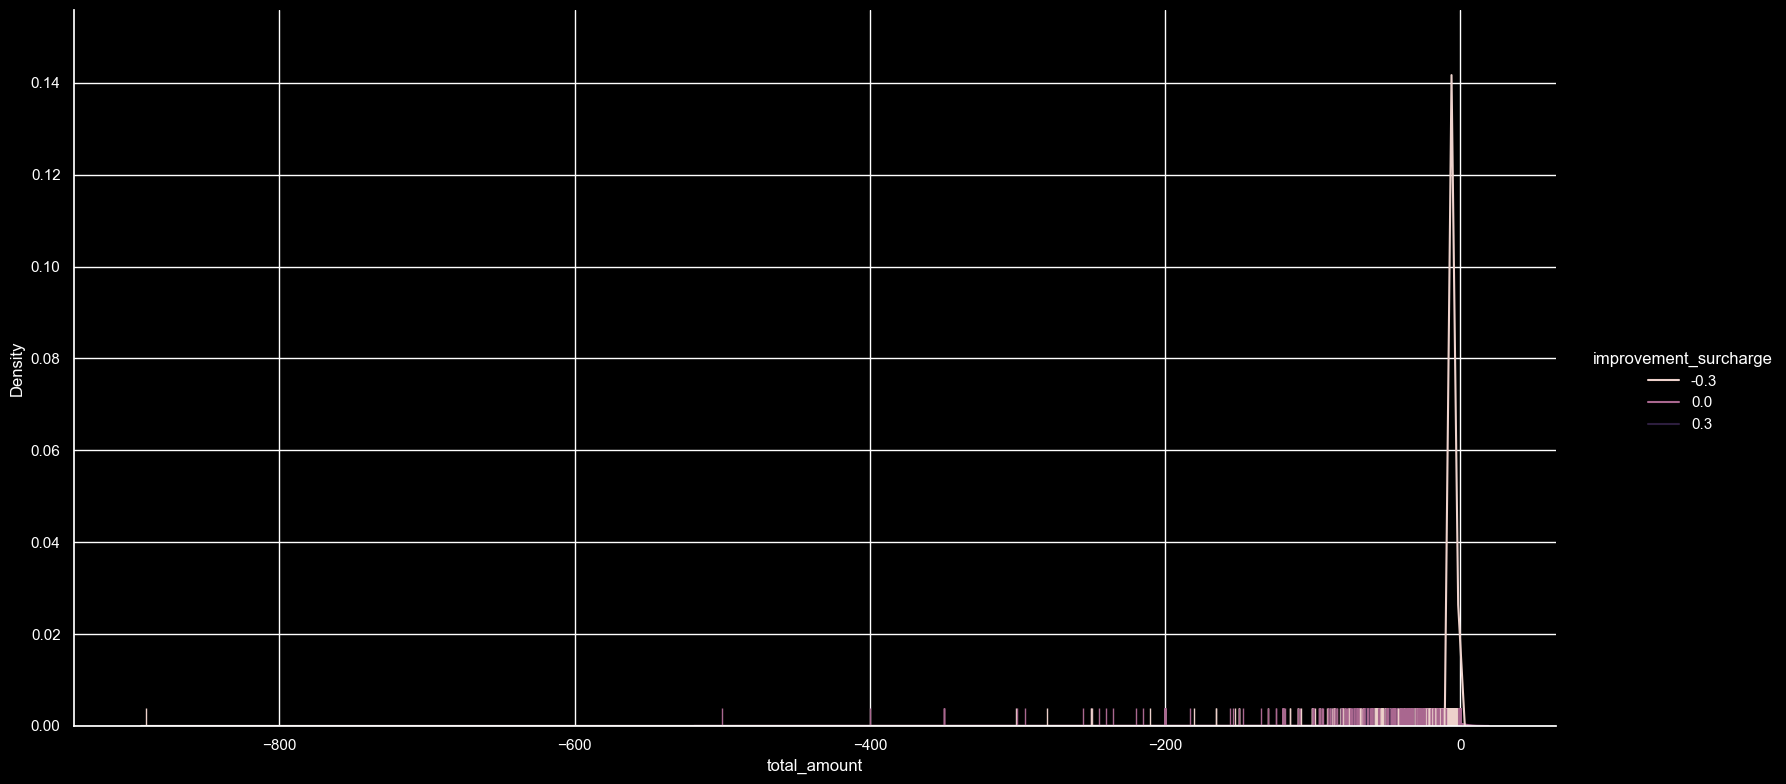

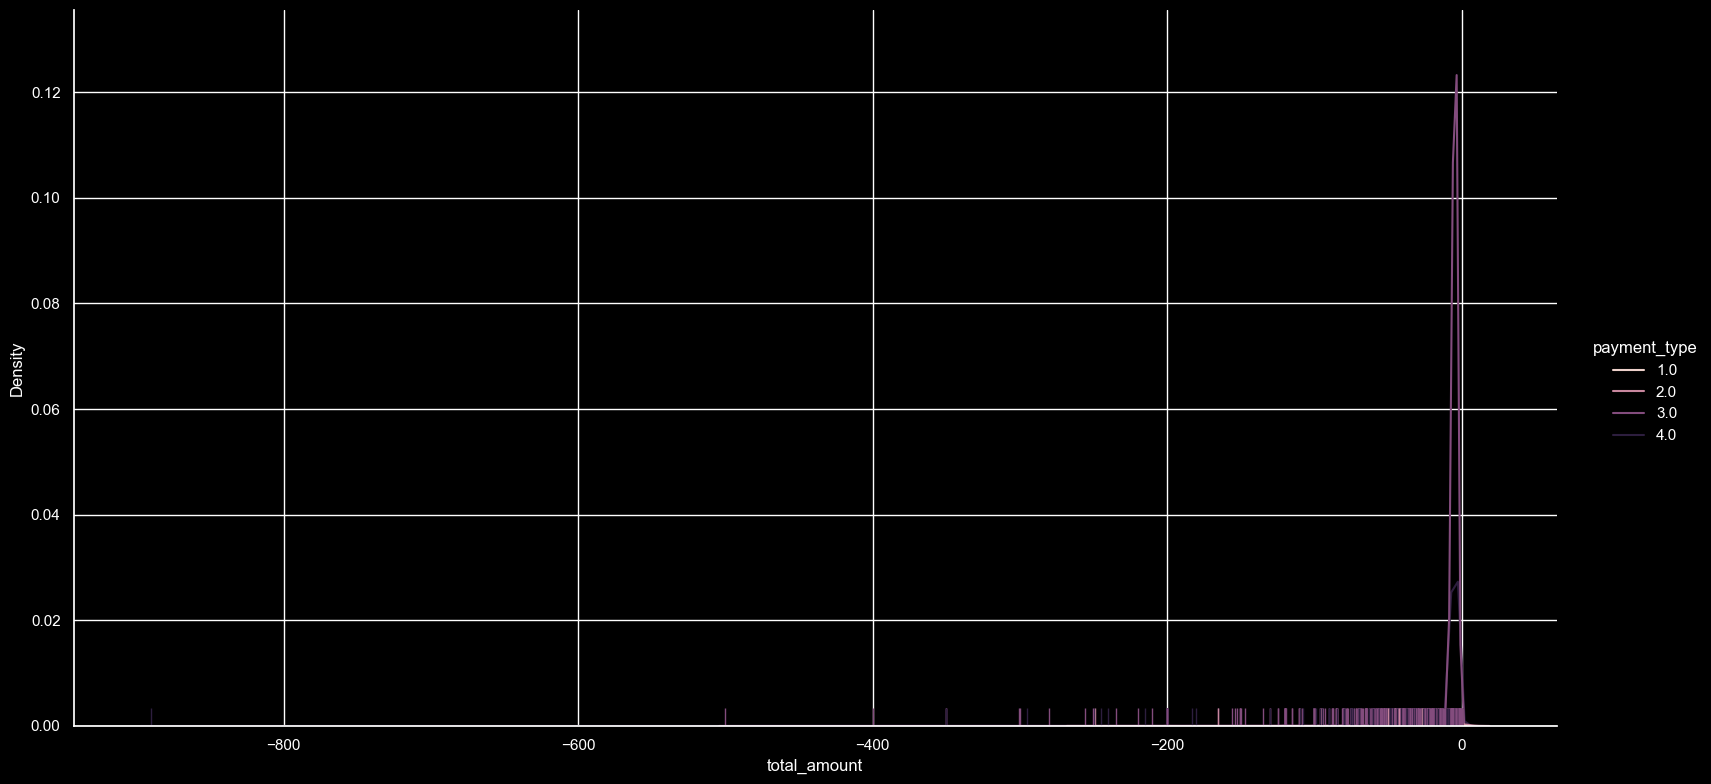

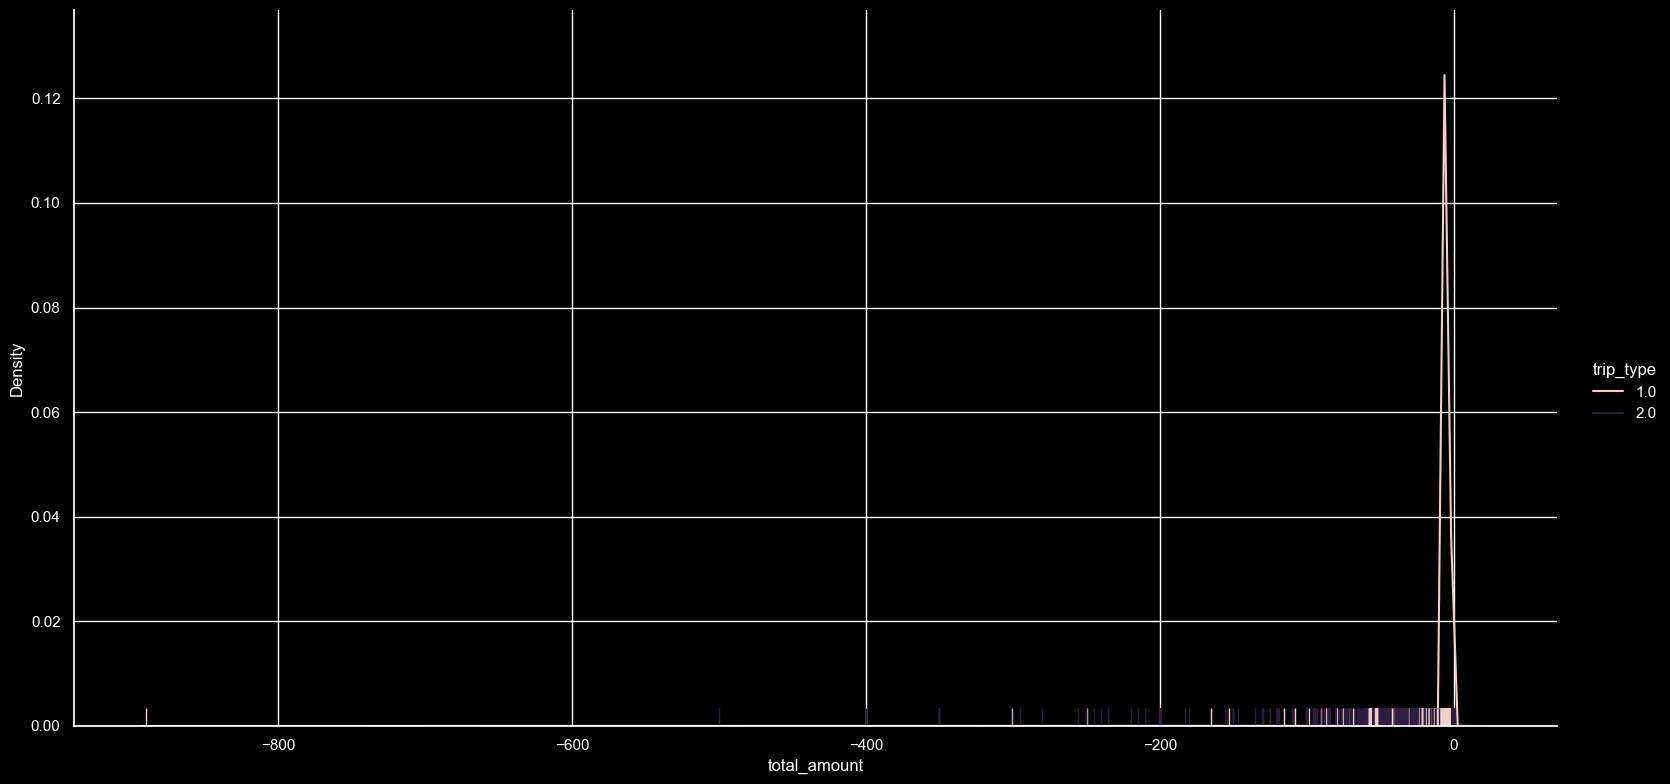

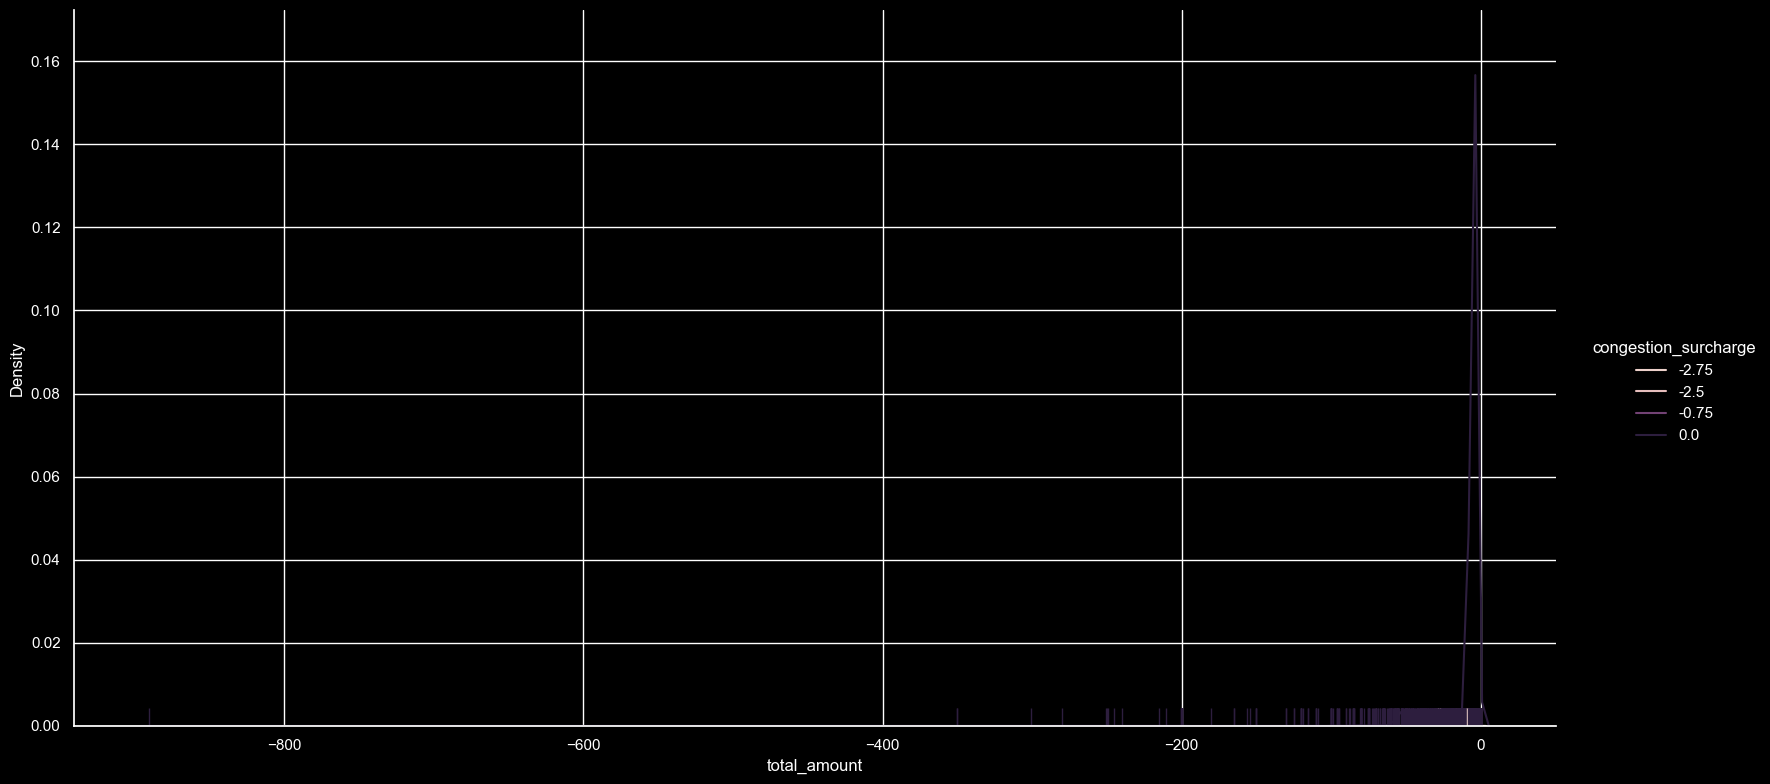

In [18]:
#sns.displot(df, x="tip_amount", binwidth=1)
for column in df.columns:
    if len(pd.unique(df[column])) < 10:
        sns.displot(data=df, x="total_amount", rug=True, height=8, aspect=2.0, kind="kde", hue=column)

In [21]:
%%time

query = """
select
    count(*) as total,
    count(*) filter (where payment_type = 1) as type_1,
    count(*) filter (where payment_type = 2) as type_2,
    count(*) filter (where payment_type = 3) as type_3,
    count(*) filter (where payment_type = 4) as type_4,
    count(*) filter (where payment_type = 5) as type_5,
    count(*) filter (where payment_type = 6) as type_6
from yellow
where total_amount < 0
""".lstrip()

out = c.execute(query).fetchall()
out

CPU times: user 8.13 s, sys: 63 ms, total: 8.19 s
Wall time: 1.12 s


[(538224, 295, 78517, 208933, 249128, 0, 0)]

In [22]:
%%time

query = """
select
    count(*) as total,
    count(*) filter (where payment_type = 1) as type_1,
    count(*) filter (where payment_type = 2) as type_2,
    count(*) filter (where payment_type = 3) as type_3,
    count(*) filter (where payment_type = 4) as type_4,
    count(*) filter (where payment_type = 5) as type_5,
    count(*) filter (where payment_type = 6) as type_6
from yellow
where total_amount < 0
and tip_amount < 0
""".lstrip()

out = c.execute(query).fetchall()
out

CPU times: user 2.48 s, sys: 406 ms, total: 2.88 s
Wall time: 536 ms


[(7284, 251, 0, 6004, 1002, 0, 0)]

In [23]:
c.close()
#dc.close()